## Założenia projektu

W ramach projektu anaizowane będą ceny akcji spółek, których jednym z rodzajów działaności jest streaming filmów i seriali:
* Netflix
* Apple (Apple TV)
* Warner Bros (HBO)
* Disney (Disney+)
* Amazon (Amazon Prime)
* CBS (Showtime)

Jako dodatkowa zmienna objaśniająca (poza samym szeregiem czasowym tj. historycznymi cenami akcji) uwzględniona zostanie liczba aktywnych subskrypcji ich serwisów streamingowych.
Dane na temat cen spółek zostaną pozyskane ze strony https://www.nasdaq.com/ z wykorzystaniem biblioteki przeznaczonej dla języka Python i klucza API wygenerowanego dla konta studenckiego

Dane na temat liczby uzytkowników poszczególnych platform pozyskane zostaną z innych źródeł (Statista). Te dane przedstawione są w formie kwartalnej.
* Netflix - https://www.statista.com/statistics/250934/quarterly-number-of-netflix-streaming-subscribers-worldwide/
* Apple TV - 
* HBO - https://www.statista.com/statistics/539290/hbo-now-subscribers/
* Disney+ - https://www.statista.com/statistics/1095372/disney-plus-number-of-subscribers-us/
* Amazon Prime - https://www.statista.com/statistics/504687/number-of-amazon-prime-subscription-households-usa/
* Showtime - 

In [18]:
# %pip install Nasdaq-Data-Link

In [14]:
import nasdaqdatalink
import requests
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

#Wygenerowany klucz dla konta
nasdaqdatalink.ApiConfig.api_key = "ibWexyU5CGhGxu2FxAT-"


### Sprawdzenie dostępnych baz dnaych

In [12]:
databases = pd.DataFrame(requests.get('https://data.nasdaq.com/api/v3/databases?download_type=full&api_key=ibWexyU5CGhGxu2FxAT-').json()['databases'])
print(databases.shape)
databases.head(2)

(91, 11)


,id,name,database_code,description,datasets_count,downloads,premium,image,favorite,url_name,exclusive
0,13111,Global Dairy Trade,GDT,,702,370399,False,http://d360wc4uc6n3i9.cloudfront.net/images/de...,False,global-dairy-trade,False
1,454,Warsaw Stock Exchange,WARSAWSE,WIG20 index has been calculated since April 16...,35,14867,False,http://d360wc4uc6n3i9.cloudfront.net/images/de...,False,warsaw-stock-exchange,False


In [14]:
databases.loc[databases['database_code']=='WIKI']

,id,name,database_code,description,datasets_count,downloads,premium,image,favorite,url_name,exclusive


WIKI/NFLX - Netflix

In [7]:
# netflix_data = nasdaqdatalink.get("WIKI/NFLX",rows=10)
# wbd_data = nasdaqdatalink.get("WIKI/WBD",rows=10)

In [76]:
netflix_data = pd.read_csv('data/Netflix.csv')
amazon_data = pd.read_csv('data/Amazon.csv')
disney_data = pd.read_csv('data/Disney.csv')
showtime_data = pd.read_csv('data/Paramount_Showtime.csv')
hbo_data = pd.read_csv('data/WBD.csv')


In [77]:
hbo_data['Open'] = hbo_data['Open'].str.replace('$','').astype(float)
netflix_data['Open'] = netflix_data['Open'].str.replace('$','').astype(float)
amazon_data['Open'] = amazon_data['Open'].str.replace('$','').astype(float)
disney_data['Open'] = disney_data['Open'].str.replace('$','').astype(float)
showtime_data['Open'] = showtime_data['Open'].str.replace('$','').astype(float)

In [78]:
hbo_data = hbo_data.iloc[::-1]
netflix_data = netflix_data.iloc[::-1]
amazon_data = amazon_data.iloc[::-1]
disney_data = disney_data.iloc[::-1]
showtime_data = showtime_data.iloc[::-1]

In [79]:
datasets = {'hbo':hbo_data,
            'netflix':netflix_data,
            'showtime':showtime_data,
            'amazon':amazon_data,
            'disney':disney_data}
for key,value in datasets.items():
    value['Date'] = pd.to_datetime(value['Date'],format='%m/%d/%Y')
    value.set_index('Date',drop=True, inplace=True)

### Przykładowe dane

## Testy statystyczne ceny otwarcia

<AxesSubplot:xlabel='Date'>

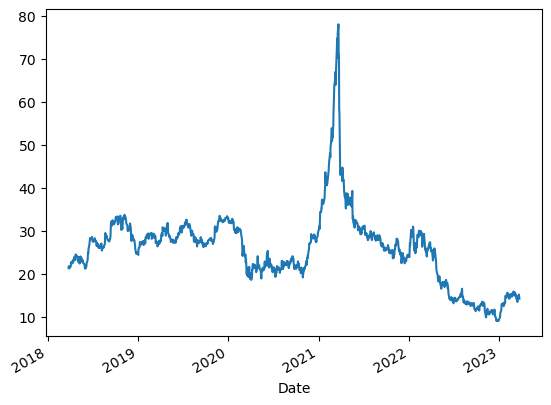

In [80]:
datasets['hbo']['Open'].plot()

In [81]:
datasets['hbo']

,Close/Last,Volume,Open,High,Low
Date,,,,,
2018-03-26,$21.74,9727999,21.37,$21.81,$20.98
2018-03-27,$21.68,4162152,21.72,$22.20,$21.55
2018-03-28,$21.17,4578942,21.67,$21.93,$21.07
2018-03-29,$21.43,6120466,21.21,$21.61,$20.975
2018-04-02,$21.58,6425394,21.66,$22.115,$21.45
...,...,...,...,...,...
2023-03-20,$14.24,16431870,14.26,$14.54,$14.11
2023-03-21,$15.09,17627860,14.48,$15.14,$14.41
2023-03-22,$14.51,13584270,15.13,$15.2691,$14.48


### Test jednostajności

### Test normlanosci rozkładu

In [91]:
from scipy.stats import kstest

def test_normalnosci_rozkladu(data): 
    res = kstest(data,'norm')
    print(res)
    if res[1]<0.05:
        print('Rozkład NIE JEST rozkładem normalnym')
    else:
        print('Rozkład JEST rozkładem normalnym')
    print(20*'-')


print('Wyniki testów jednostajności Kołmogorova-Smirnova')
print(20*'-')
print(20*'-')
for name,data in datasets.items():
    print(name.title())
    test_normalnosci_rozkladu(data['Open'])
    

Wyniki testów jednostajności Kołmogorova-Smirnova
--------------------
--------------------
Hbo
KstestResult(statistic=1.0, pvalue=0.0)
Rozkład NIE JEST rozkładem normalnym
--------------------
Netflix
KstestResult(statistic=1.0, pvalue=0.0)
Rozkład NIE JEST rozkładem normalnym
--------------------
Showtime
KstestResult(statistic=1.0, pvalue=0.0)
Rozkład NIE JEST rozkładem normalnym
--------------------
Amazon
KstestResult(statistic=1.0, pvalue=0.0)
Rozkład NIE JEST rozkładem normalnym
--------------------
Disney
KstestResult(statistic=1.0, pvalue=0.0)
Rozkład NIE JEST rozkładem normalnym
--------------------


### Test stacjonarności

In [94]:
from statsmodels.tsa.stattools import adfuller

def test_stacjonarnosci(data): 
    res = adfuller(data)
    print(res)
    if res[1]<=0.05:
        print('Rozkład JEST stacjonarny')
    else:
        print('Rozkład NIE JEST stacjonarny')
    print(20*'-')


print('Wyniki testów jednostajności Kołmogorova-Smirnova')
print(20*'-')
print(20*'-')
for name,data in datasets.items():
    print(name.title())
    test_stacjonarnosci(data['Open'])
    

Wyniki testów jednostajności Kołmogorova-Smirnova
--------------------
--------------------
Hbo
(-2.3164481171735325, 0.16671798783245212, 23, 1235, {'1%': -3.4356560275160835, '5%': -2.8638831211270817, '10%': -2.568017509711682}, 3380.6035816011986)
Rozkład NIE JEST stacjonarny
--------------------
Netflix
(-1.656621638237094, 0.4535893735048184, 0, 1258, {'1%': -3.4355588184378574, '5%': -2.8638402312881497, '10%': -2.5679946684494275}, 9396.547550768599)
Rozkład NIE JEST stacjonarny
--------------------
Showtime
(-2.073374120607253, 0.25535487776440513, 15, 1243, {'1%': -3.435621806786881, '5%': -2.8638680226791444, '10%': -2.5680094689100477}, 4095.876273576793)
Rozkład NIE JEST stacjonarny
--------------------
Amazon
(-1.6047687439543967, 0.48119756810647846, 1, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, 6129.570369575255)
Rozkład NIE JEST stacjonarny
--------------------
Disney
(-1.4512444892408702, 0.5574775387467671, 1, 1257, {'1%':

### Test autokorelacji

In [109]:
import statsmodels.api as sm

def test_stacjonarnosci(data): 
    res = adfuller(data)
    print(res)
    if res[1]<=0.05:
        print('Rozkład JEST stacjonarny')
    else:
        print('Rozkład NIE JEST stacjonarny')
    print(20*'-')


print('Wyniki testów jednostajności Kołmogorova-Smirnova')
print(20*'-')
print(20*'-')
for name,data in datasets.items():
    print(name.title())
    X = sm.add_constant([x for x in range(data.shape[0])])
    y = data['Open']
    reg = sm.OLS(y, X).fit()
    print(reg.summary())
    print(20*'-')


Wyniki testów jednostajności Kołmogorova-Smirnova
--------------------
--------------------
Hbo
                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           2.16e-43
Time:                        21:56:36   Log-Likelihood:                -4437.9
No. Observations:                1259   AIC:                             8880.
Df Residuals:                    1257   BIC:                             8890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Uwagi: czy stawiane prognonozy będą w okresie kwartalnym? czy zamierzają Panowie zbudować model z różnymi częstotliwościami? Jakich okresów będą dotyczyły analizy i prognozy? czy w tym okresie występują jakies zmiany strukturalne?